In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")  

# Problem Statement


In [2]:
df=pd.read_csv("D:/program session/project/IMDB Movie Analysis With PowerBI/IMDB.csv")
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


The dataset provided is related to IMDB Movies. A potential problem to investigate could be: **"What factors influence the success of a movie on IMDB?"** Here, success can be defined by high IMDB ratings. The impact of this problem is significant for movie producers, directors, and investors who want to understand what makes a movie successful to make informed decisions in their future projects. 

# Data Scientist Problem

This is Supervised Reggression Problem beacuse we are prediting Contidinous Target Variable 

In [3]:
# **checking any space,dot,anything inside columns**
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [4]:
#Basic statistical analysis of dataset
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [5]:
# checking for the Target data is balanced or not
df['imdb_score'].value_counts()

imdb_score
6.7    223
6.6    201
7.2    195
6.5    186
6.4    185
      ... 
9.5      1
1.6      1
9.3      1
1.7      1
9.2      1
Name: count, Length: 78, dtype: int64

# Data_cleaning

## Missing Value

In [6]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [7]:
#percentage of Null value
df.isnull().sum() * 100 / len(df)

color                         0.376760
director_name                 2.062265
num_critic_for_reviews        0.991473
duration                      0.297442
director_facebook_likes       2.062265
actor_3_facebook_likes        0.456078
actor_2_name                  0.257783
actor_1_facebook_likes        0.138806
gross                        17.529248
genres                        0.000000
actor_1_name                  0.138806
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.456078
facenumber_in_poster          0.257783
plot_keywords                 3.033908
movie_imdb_link               0.000000
num_user_for_reviews          0.396589
language                      0.277613
country                       0.099147
content_rating                6.008328
budget                        9.756098
title_year                    2.141582
actor_2_facebook_likes        0.257783
imdb_score               

In [8]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [9]:
# Fill missing values with the mode of each respective column

df = df.fillna({
    'color': df['color'].mode()[0],
    'director_name': df['director_name'].mode()[0],
    'actor_2_name': df['actor_2_name'].mode()[0],
    'actor_1_name': df['actor_1_name'].mode()[0],
    'actor_3_name': df['actor_3_name'].mode()[0],
    'plot_keywords': df['plot_keywords'].mode()[0],
    'num_user_for_reviews': df['num_user_for_reviews'].mode()[0],
    'language': df['language'].mode()[0],
    'country': df['country'].mode()[0],
    'content_rating': df['content_rating'].mode()[0]})

In [10]:
# filling the missing values using statistical techniques
df = df.fillna({'num_critic_for_reviews': df['num_critic_for_reviews'].mean(),
                'director_facebook_likes': df['director_facebook_likes'].mean(),
                'actor_3_facebook_likes': df['actor_3_facebook_likes'].mean(),
                'actor_1_facebook_likes': df['actor_1_facebook_likes'].mean(),
                'gross': df['gross'].mean(),
                'num_voted_users': df['num_voted_users'].mean(),
                'cast_total_facebook_likes': df['cast_total_facebook_likes'].mean(),
                'facenumber_in_poster': df['facenumber_in_poster'].mean(),
                'budget': df['budget'].mean(),
                'title_year': df['title_year'].mean(),
                'aspect_ratio': df['aspect_ratio'].mean(),
                'actor_2_facebook_likes': df['actor_2_facebook_likes'].mean(),
               'duration': df['duration'].mean()})

In [11]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

# Wrong Formate

In [12]:
df.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews          object
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [13]:
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0


In [14]:
df['director_facebook_likes'] = df['director_facebook_likes'].astype(int)

df['num_critic_for_reviews'] = df['num_critic_for_reviews'].astype(int)
df['actor_2_facebook_likes'] = df['actor_2_facebook_likes'].astype(int)

In [15]:
df["actor_1_facebook_likes"]=df["actor_1_facebook_likes"].astype(int)

In [18]:
df['title_year'] = pd.to_datetime(df['title_year'], format='%Y')

In [23]:
df.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178.0,0,855.0,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,1970,936,7.9,1.78,33000
1,Color,Gore Verbinski,302,169.0,563,1000.0,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,1970,5000,7.1,2.35,0


In [19]:
df.dtypes

color                                object
director_name                        object
num_critic_for_reviews                int32
duration                            float64
director_facebook_likes               int32
actor_3_facebook_likes              float64
actor_2_name                         object
actor_1_facebook_likes                int32
gross                               float64
genres                               object
actor_1_name                         object
movie_title                          object
num_voted_users                       int64
cast_total_facebook_likes             int64
actor_3_name                         object
facenumber_in_poster                float64
plot_keywords                        object
movie_imdb_link                      object
num_user_for_reviews                 object
language                             object
country                              object
content_rating                       object
budget                          

# Duplicates

In [20]:
df.duplicated().sum()

45

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.duplicated().sum()

0

# Text Errors 

In [23]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating']

In [29]:
df['color'].value_counts()

color
Color               4791
 Black and White     207
Name: count, dtype: int64

In [30]:
df['director_name'].value_counts()

director_name
Steven Spielberg    129
Woody Allen          22
Clint Eastwood       20
Martin Scorsese      20
Ridley Scott         17
                   ... 
Dan Mazer             1
Mabel Cheung          1
Jamie Thraves         1
David Winters         1
Daniel Hsia           1
Name: count, Length: 2398, dtype: int64

In [31]:
df['actor_2_name'].value_counts()

actor_2_name
Morgan Freeman      33
Charlize Theron     15
Brad Pitt           13
James Franco        11
Meryl Streep        11
                    ..
Suzie Steen          1
Brian Blessed        1
Michael Beck         1
Khulan Chuluun       1
Brian Herzlinger     1
Name: count, Length: 3032, dtype: int64

In [32]:
df['genres'].value_counts()

genres
Drama                                         235
Comedy                                        205
Comedy|Drama                                  189
Comedy|Drama|Romance                          187
Comedy|Romance                                158
                                             ... 
Action|Crime|Drama|Mystery|Sci-Fi|Thriller      1
Action|Drama|Fantasy|Horror|Thriller            1
Action|Thriller|Western                         1
Action|Adventure|Drama|Family                   1
Comedy|Crime|Horror                             1
Name: count, Length: 914, dtype: int64

In [33]:
df['actor_1_name'].value_counts()

actor_1_name
Robert De Niro    56
Johnny Depp       40
Nicolas Cage      32
J.K. Simmons      31
Bruce Willis      30
                  ..
Linda Blair        1
Janet Jackson      1
Phil Vischer       1
Amy Bruni          1
John August        1
Name: count, Length: 2097, dtype: int64

In [34]:
df['movie_title'].value_counts()

movie_title
Ben-Hur                       3
Home                          3
King Kong                     3
A Nightmare on Elm Street     2
The Fast and the Furious      2
                             ..
88 Minutes                    1
Love & Other Drugs            1
Eight Legged Freaks           1
Fled                          1
My Date with Drew             1
Name: count, Length: 4917, dtype: int64

In [35]:
df['actor_3_name'].value_counts()

actor_3_name
Ben Mendelsohn      31
Steve Coogan         8
Sam Shepard          7
Anne Hathaway        7
Robert Duvall        7
                    ..
Hayley McFarland     1
Jay Mohr             1
Mike White           1
Ski Carr             1
Jon Gunn             1
Name: count, Length: 3521, dtype: int64

In [36]:
df['plot_keywords'].value_counts()

plot_keywords
based on novel                                                                       156
animal name in title|ape abducts a woman|gorilla|island|king kong                      3
one word title                                                                         3
alien friendship|alien invasion|australia|flying car|mother daughter relationship      3
cia|hezbollah|lebanon|oil|prince                                                       2
                                                                                    ... 
evil|fight|hell|psychic|psychologist                                                   1
boxer|boxing training|death of wife|male in shower|rage                                1
critically acclaimed|drug cartel|juarez mexico|u.s. mexico border|war on drugs         1
coach|college basketball|national championship|ncaa|texas                              1
actress name in title|crush|date|four word title|video camera                          1
Name: c

In [37]:
df['movie_imdb_link'].value_counts()

movie_imdb_link
http://www.imdb.com/title/tt2638144/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt2224026/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt0360717/?ref_=fn_tt_tt_1    3
http://www.imdb.com/title/tt1939659/?ref_=fn_tt_tt_1    2
http://www.imdb.com/title/tt3332064/?ref_=fn_tt_tt_1    2
                                                       ..
http://www.imdb.com/title/tt0758752/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0271367/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0116320/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0120008/?ref_=fn_tt_tt_1    1
http://www.imdb.com/title/tt0378407/?ref_=fn_tt_tt_1    1
Name: count, Length: 4919, dtype: int64

In [38]:
df['num_user_for_reviews'].value_counts()

num_user_for_reviews
1       71
3       33
26      32
2       32
10      29
        ..
1344     1
1401     1
1206     1
856      1
586      1
Name: count, Length: 955, dtype: int64

In [39]:
df['language'].value_counts()

language
English       4676
French          73
Spanish         40
Hindi           28
Mandarin        24
German          19
Japanese        17
Cantonese       11
Russian         11
Italian         11
Portuguese       8
Korean           8
Danish           5
Arabic           5
Hebrew           5
Swedish          5
Polish           4
Norwegian        4
Persian          4
Dutch            4
Chinese          3
Thai             3
Icelandic        2
Aboriginal       2
Indonesian       2
Zulu             2
Romanian         2
Dari             2
Panjabi          1
Vietnamese       1
Slovenian        1
Greek            1
Dzongkha         1
Tamil            1
Urdu             1
Telugu           1
Kannada          1
Czech            1
Hungarian        1
Bosnian          1
Filipino         1
Mongolian        1
Maya             1
Aramaic          1
Kazakh           1
Swahili          1
Name: count, dtype: int64

In [40]:
df['country'].value_counts()

country
USA              3778
UK                443
France            154
Canada            124
Germany            96
                 ... 
Slovakia            1
Chile               1
Cambodia            1
Official site       1
Philippines         1
Name: count, Length: 65, dtype: int64

In [41]:
df['content_rating'].value_counts()

content_rating
R            2399
PG-13        1444
PG            698
Not Rated     116
G             112
Unrated        60
Approved       55
TV-14          30
TV-MA          19
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y            1
TV-Y7           1
Name: count, dtype: int64

# Data Visualization

## Feature Vs Target (Categorical Data )

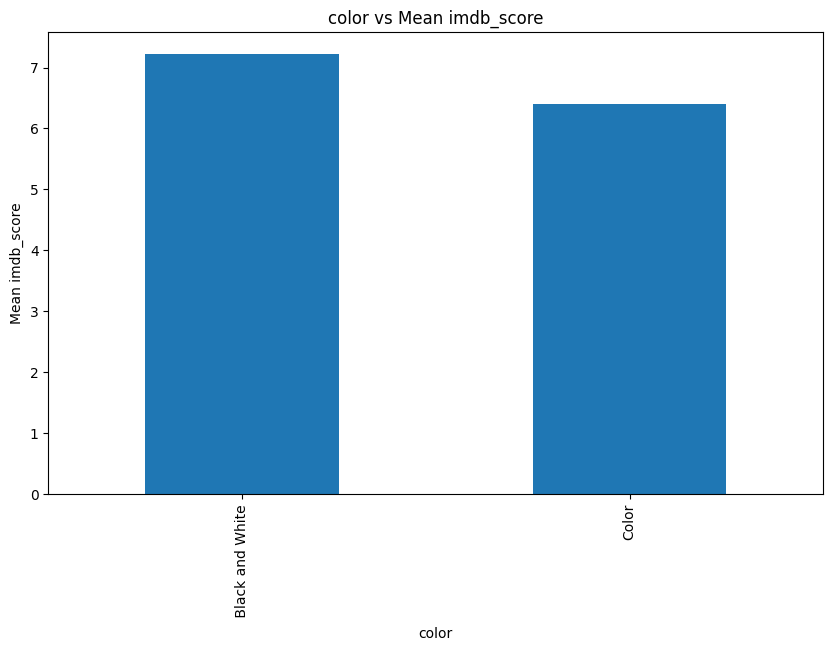

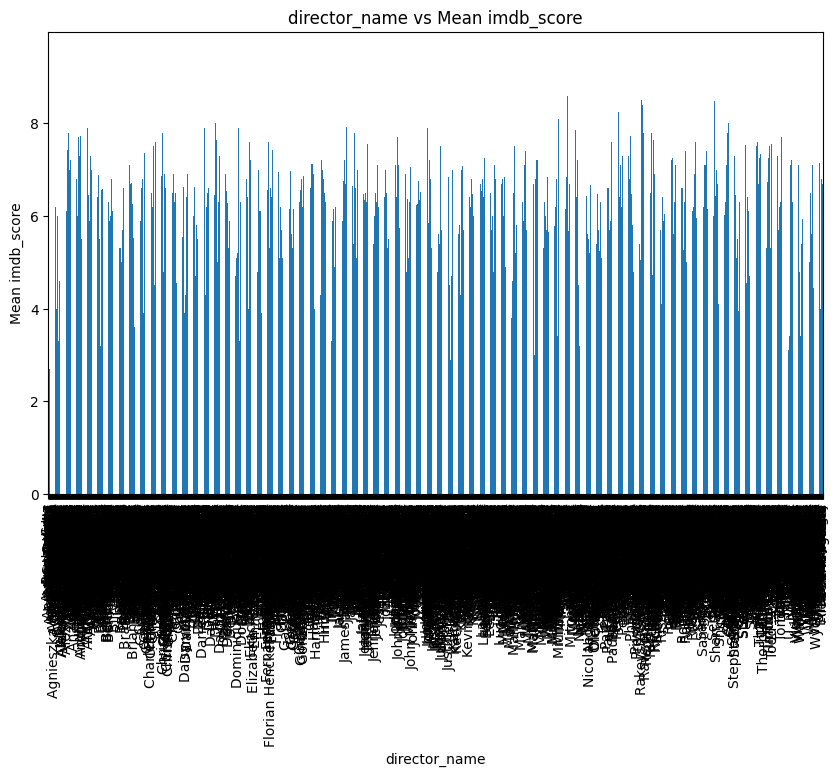

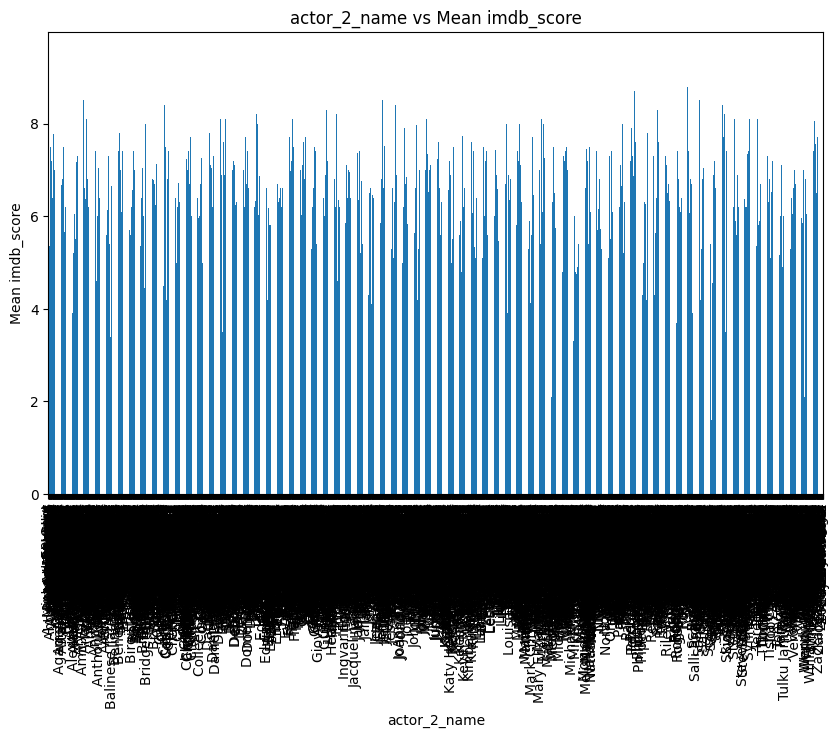

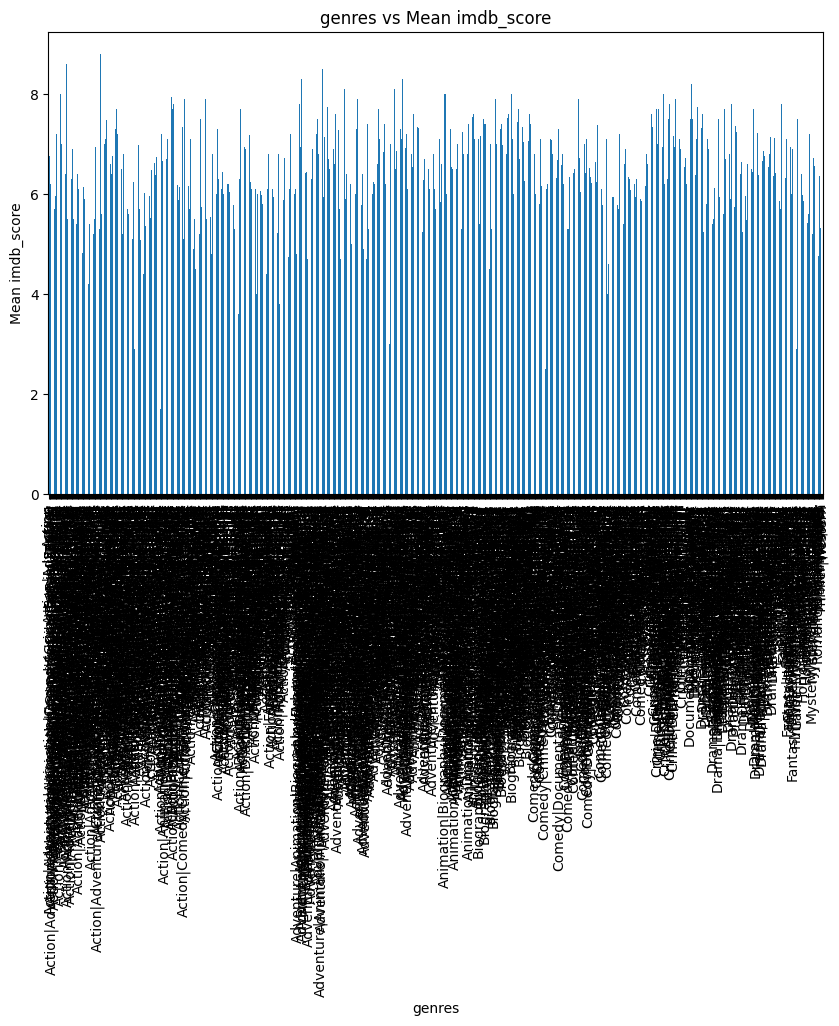

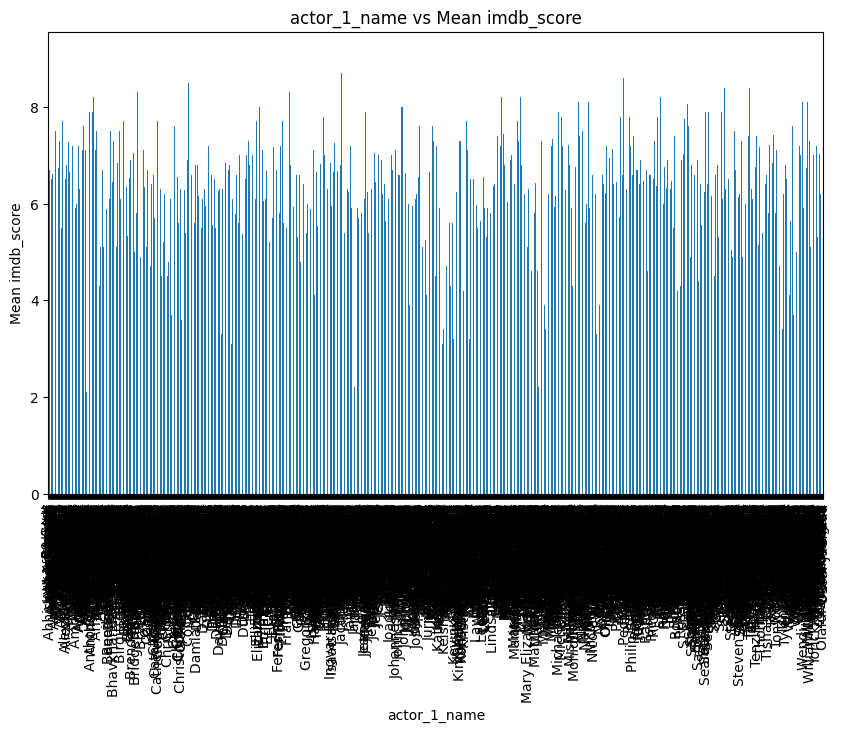

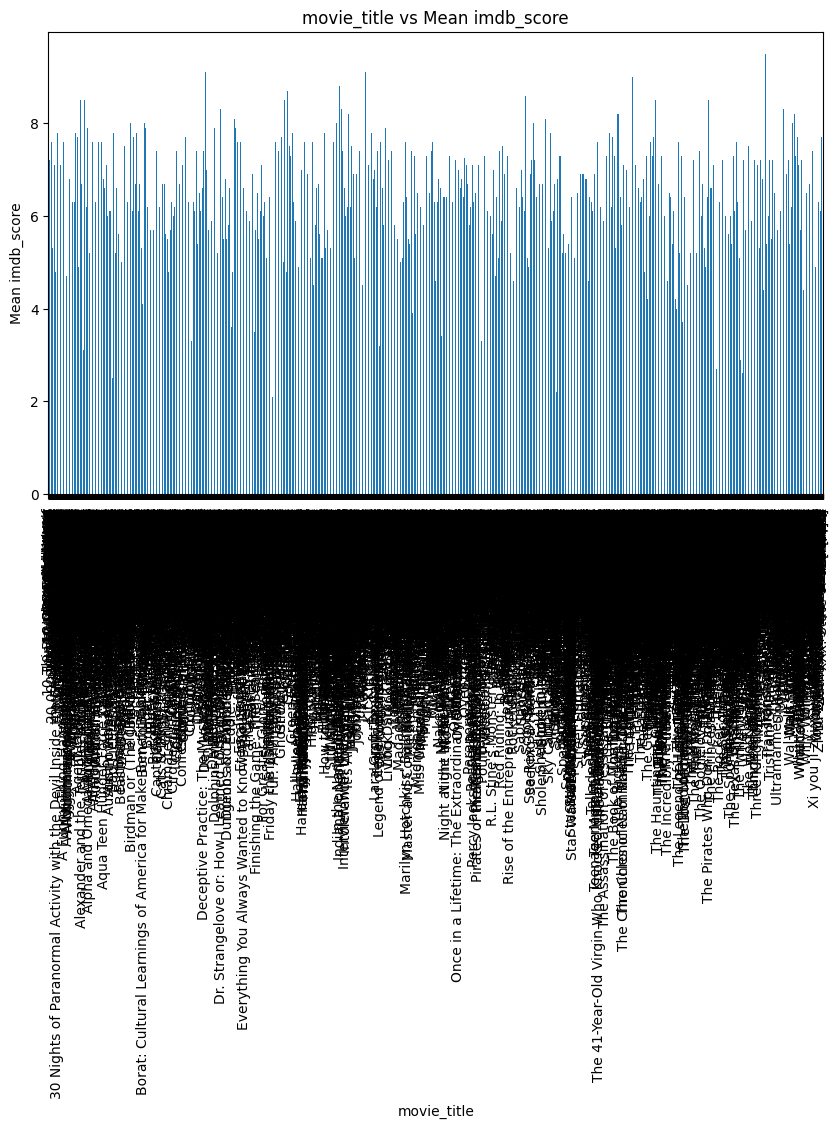

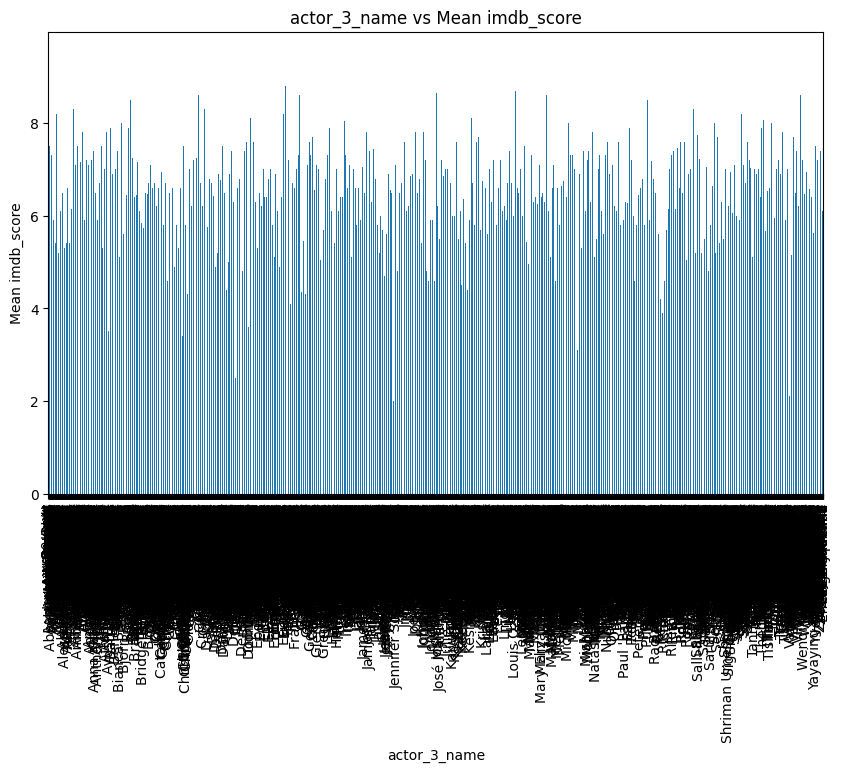

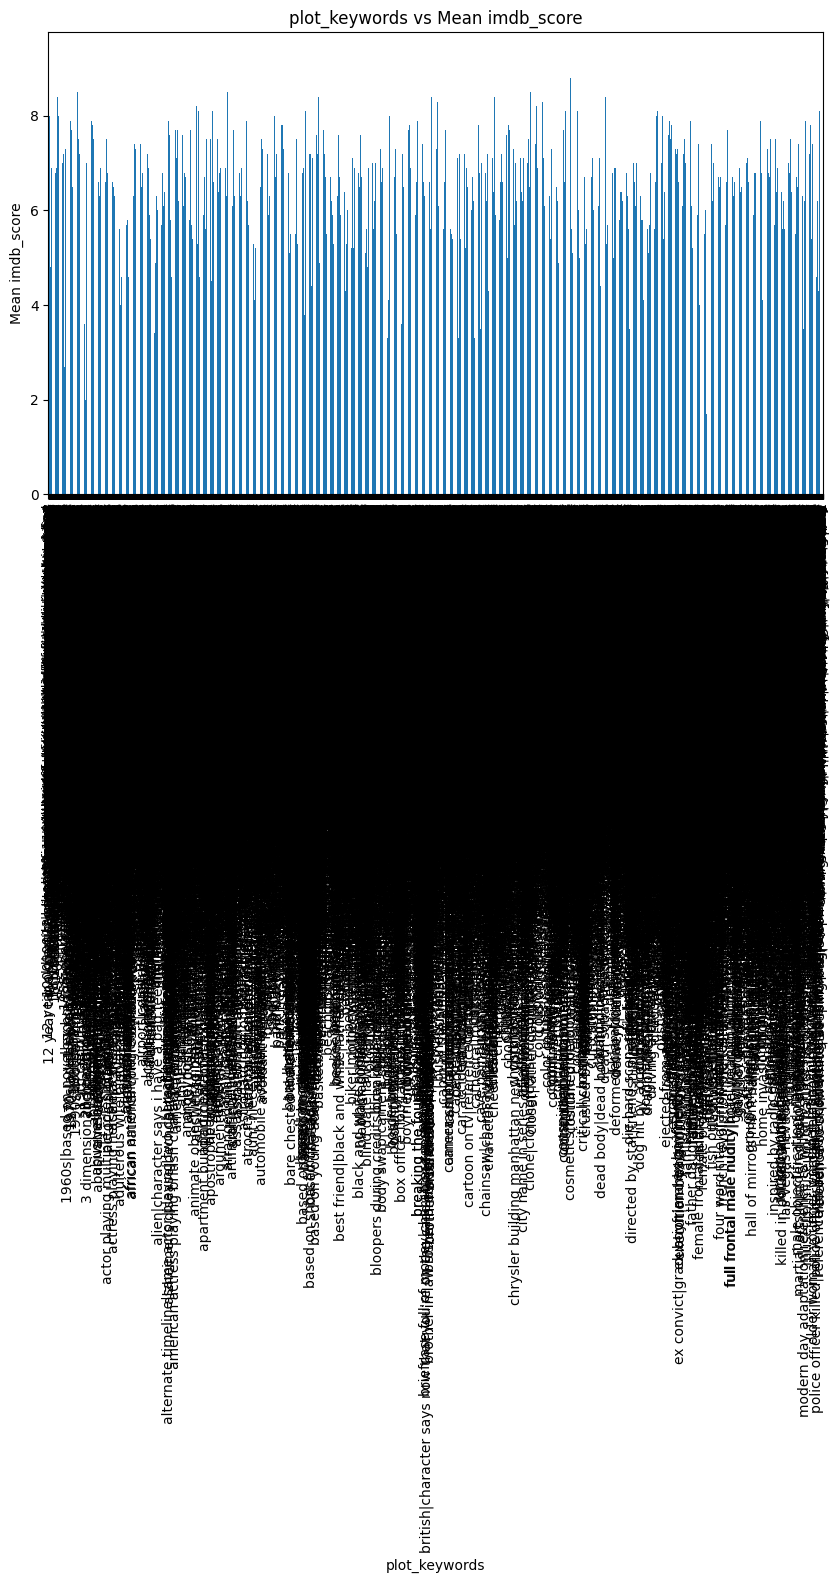

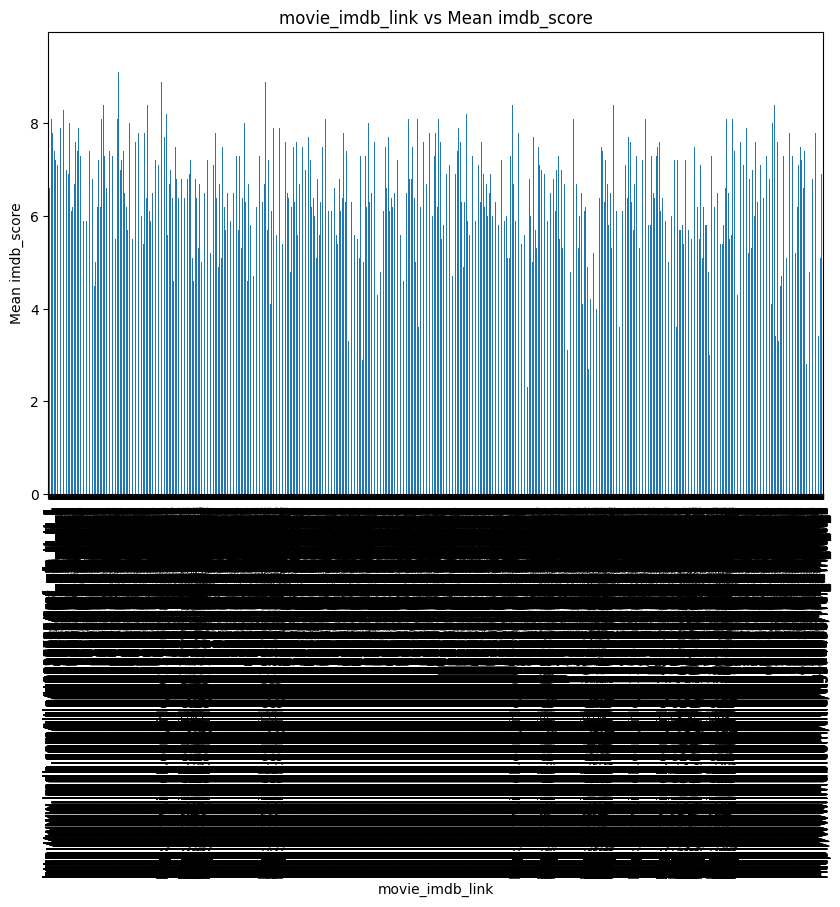

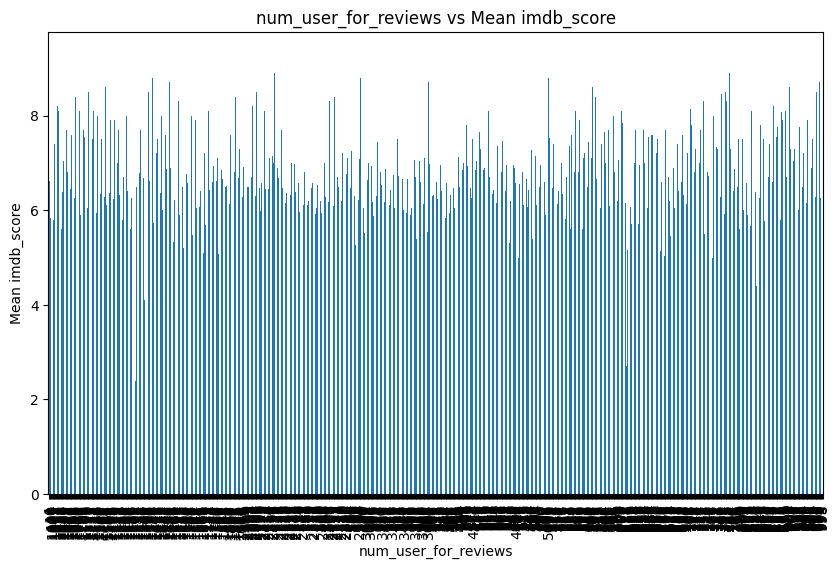

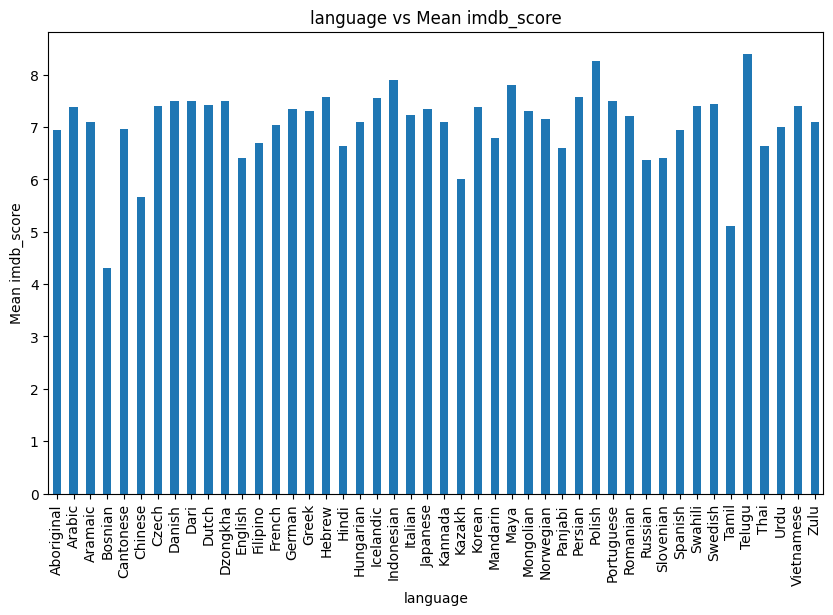

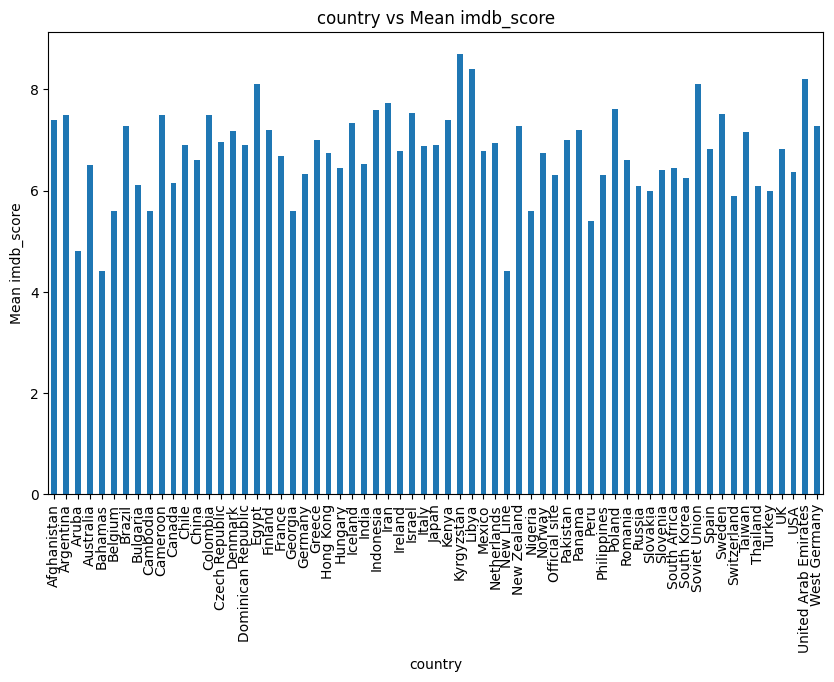

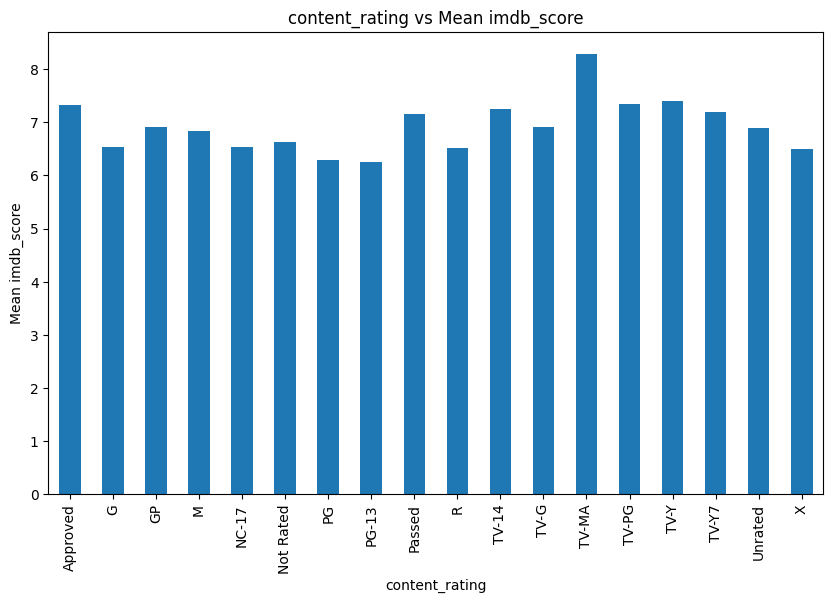

In [42]:
Feature=['color',
 'director_name',
 'actor_2_name',
 'genres',
 'actor_1_name',
 'movie_title',
 'actor_3_name',
 'plot_keywords',
 'movie_imdb_link',
 'num_user_for_reviews',
 'language',
 'country',
 'content_rating']
for feature in Feature:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['imdb_score'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean imdb_score')
    plt.title(f'{feature} vs Mean imdb_score')
    plt.show()

## Feature Vs Target (Condinues Data )

In [45]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['duration',
 'actor_3_facebook_likes',
 'gross',
 'facenumber_in_poster',
 'budget',
 'imdb_score',
 'aspect_ratio']

In [44]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes']

In [43]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int32']
integer_data_cols

['num_critic_for_reviews',
 'director_facebook_likes',
 'actor_1_facebook_likes',
 'actor_2_facebook_likes']

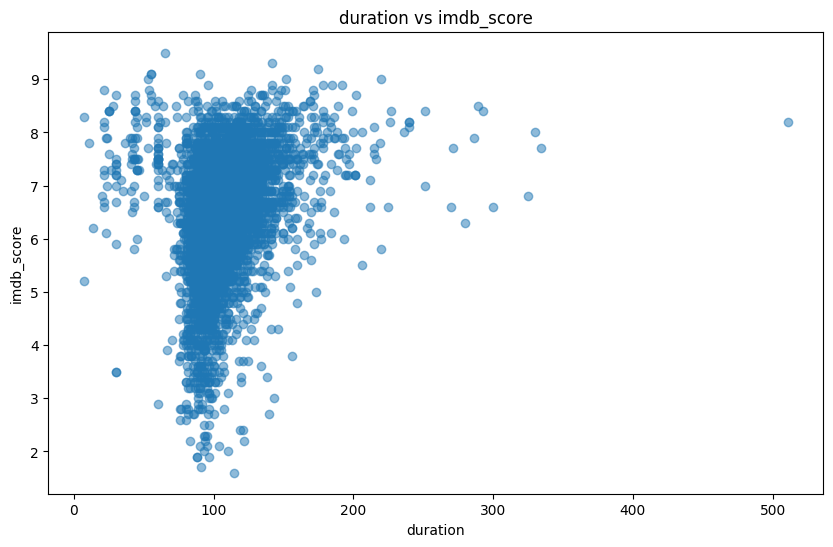

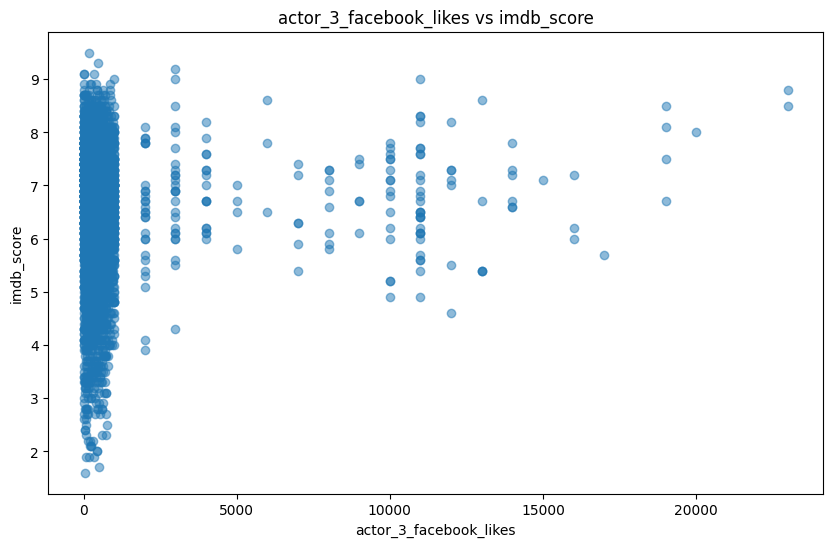

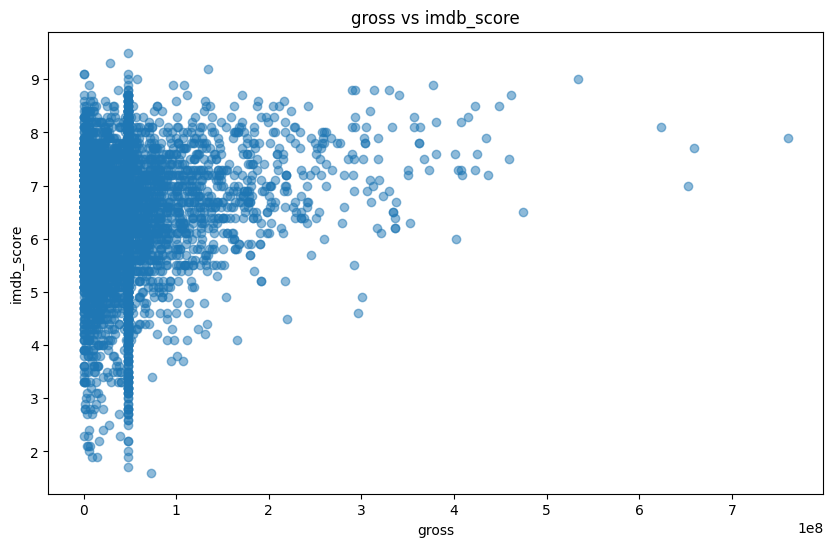

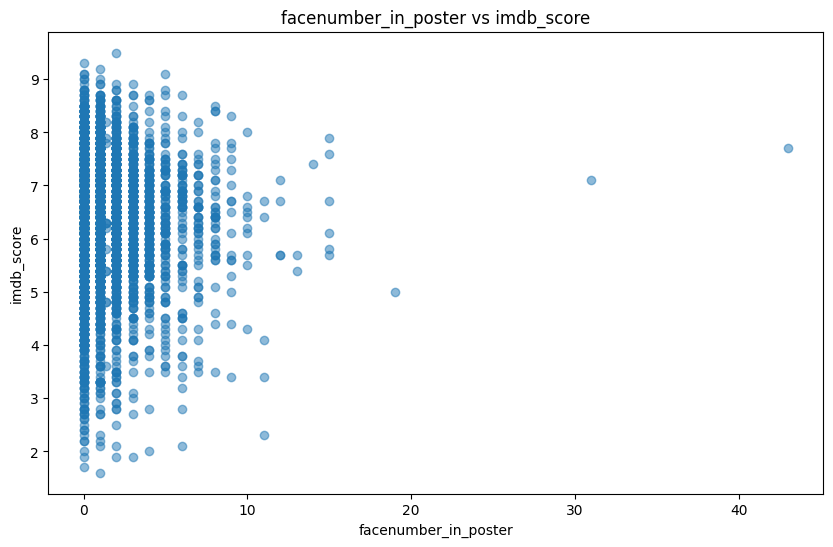

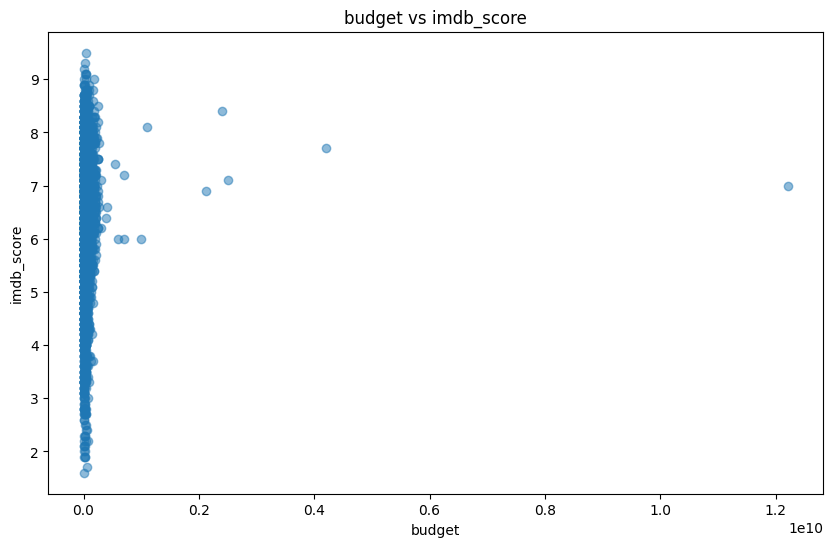

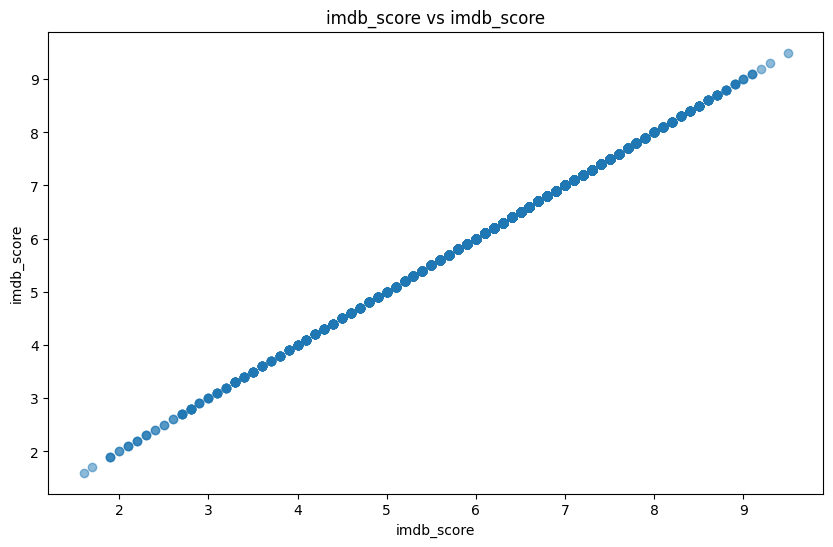

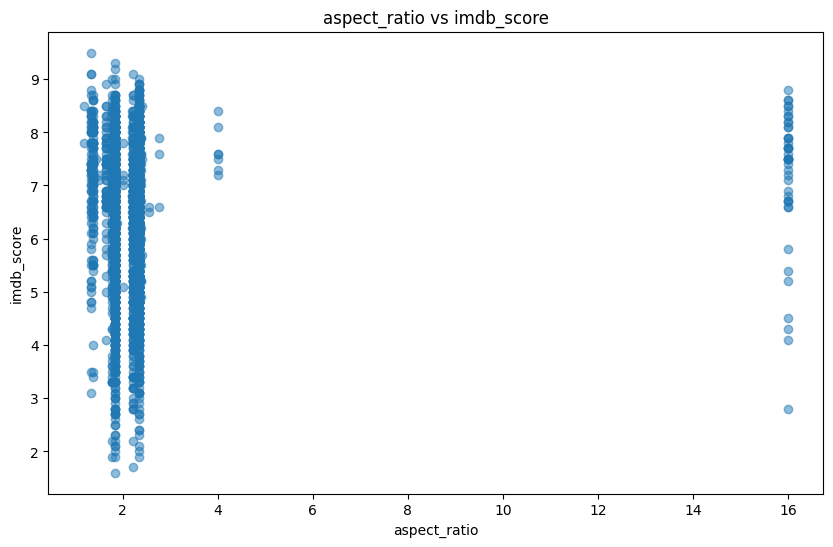

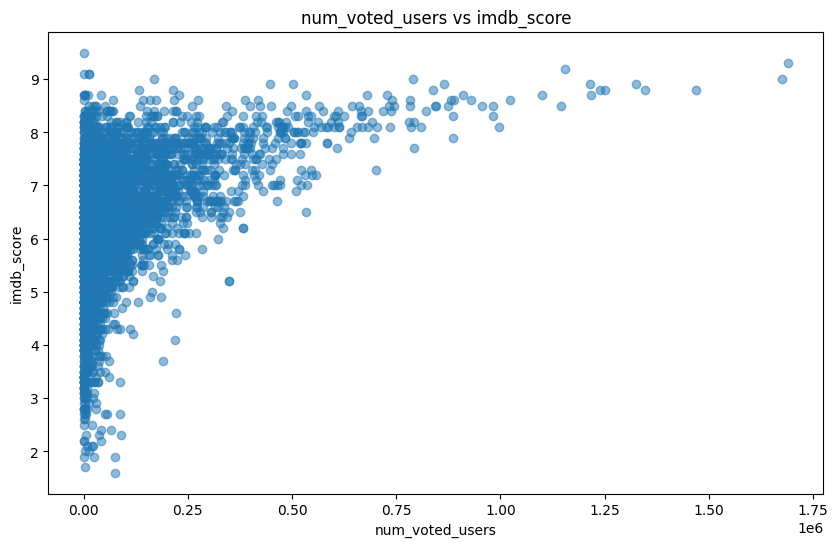

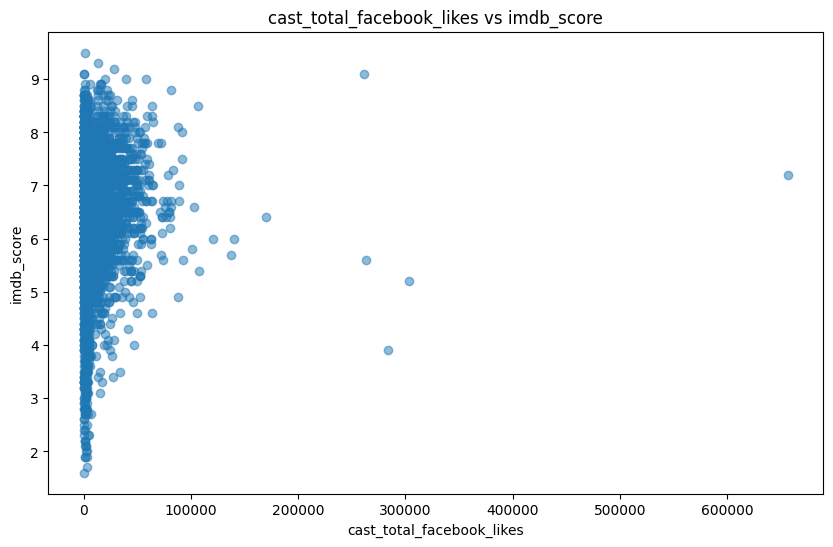

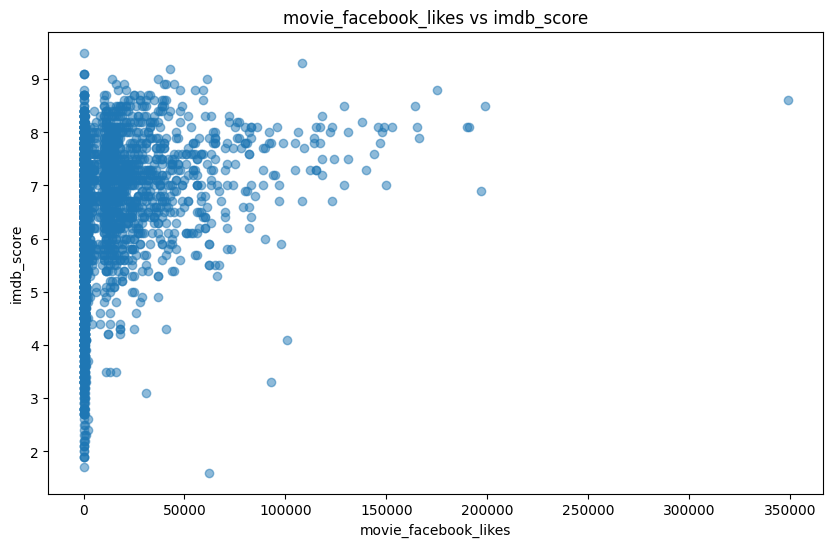

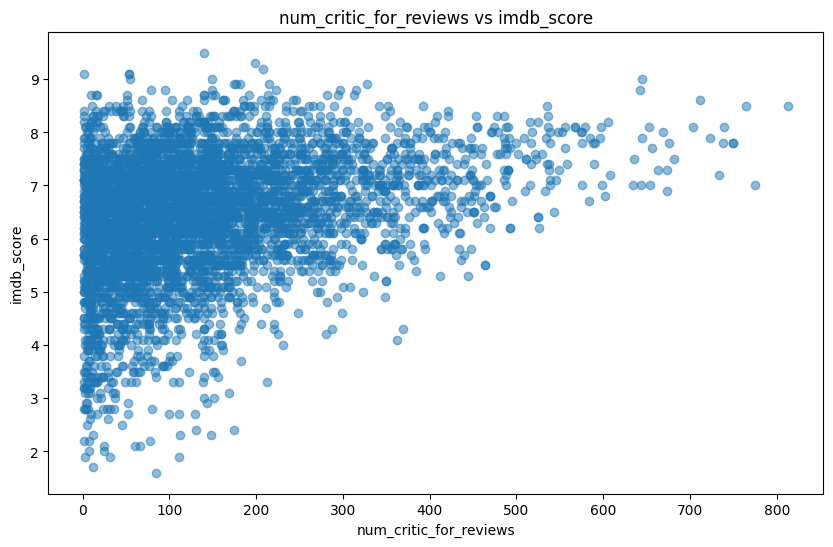

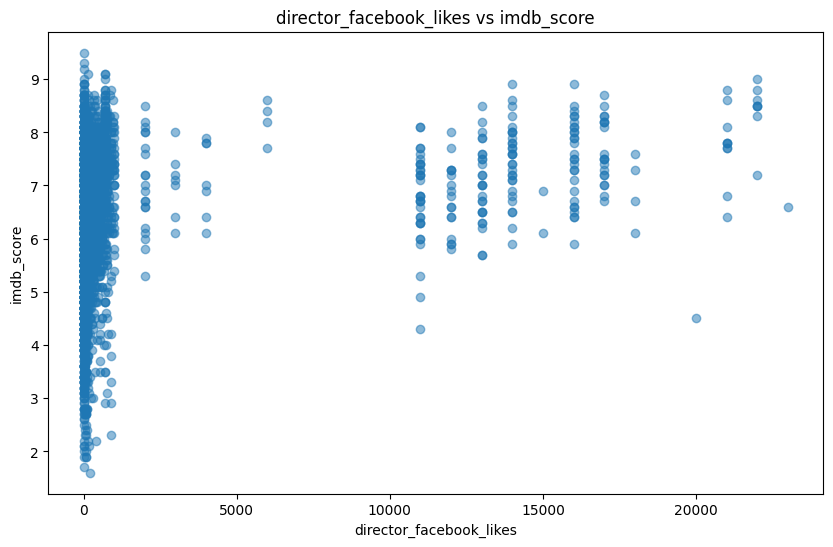

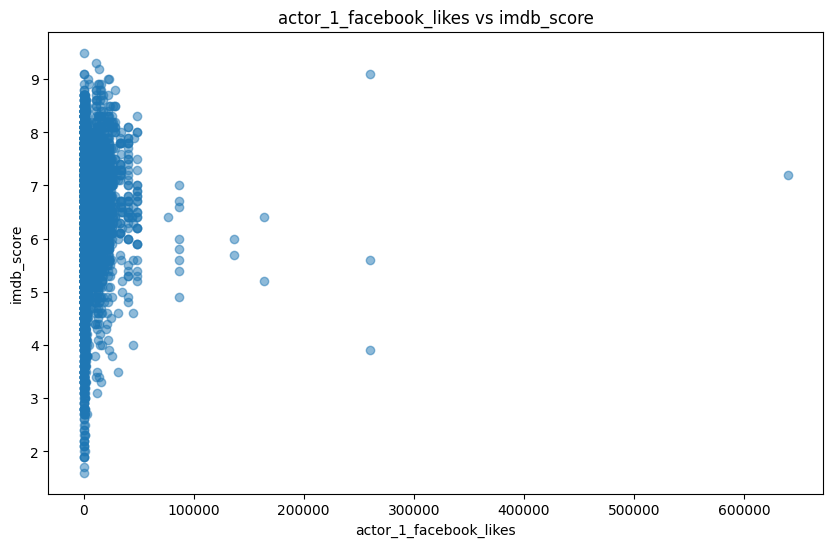

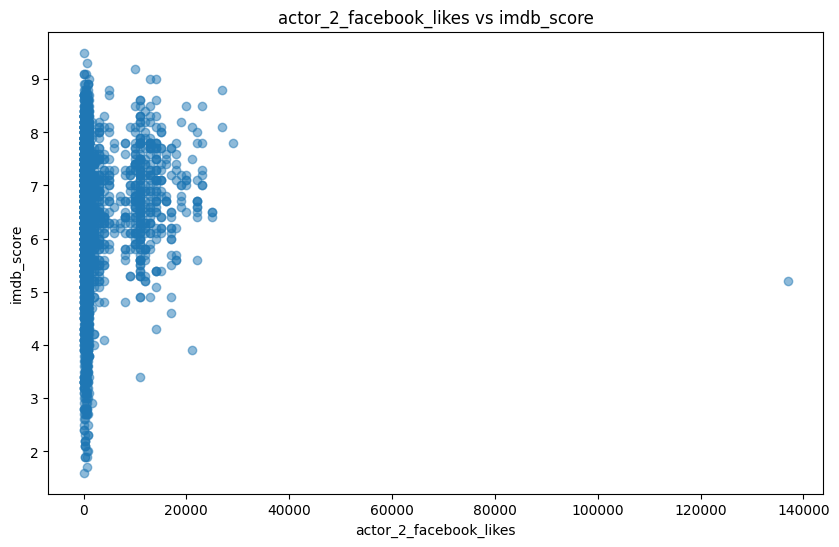

In [49]:
features = ['duration',
 'actor_3_facebook_likes',
 'gross',
 'facenumber_in_poster',
 'budget',
 'imdb_score',
 'aspect_ratio',
'num_voted_users', 'cast_total_facebook_likes', 'movie_facebook_likes',
'num_critic_for_reviews',
 'director_facebook_likes',
 'actor_1_facebook_likes',
 'actor_2_facebook_likes']
target = 'imdb_score'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature],df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

In [51]:
df.to_csv('D:/program session/project/IMDB Movie Analysis With PowerBI/final.csv')